In [1]:
import json
import requests
#from api_keys import weather_api_key
from citipy import citipy
import numpy as np
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
from datetime import timezone
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# File to Load
na_quakes_load = "../Data/na_quakes.csv"

# Read NA Data File and store into Pandas DataFrame
na_quakes = pd.read_csv(na_quakes_load)

na_quakes

,Magnitude,Unit,Alert,Location,Tsunami,Date,Longitude,Latitude,Timestamp
0,5.40,mww,green,"11 km NE of Rizo de Oro, Mexico",0,2021-06-19,-92.415000,16.0530,1624129036194
1,5.40,mww,green,"226 km S of Sand Point, Alaska",0,2021-06-18,-160.279900,53.3069,1624010561128
2,5.00,mb,NaN,"214 km SSE of Sand Point, Alaska",0,2021-06-14,-159.636300,53.4722,1623667314148
3,5.00,ml,NaN,"31 km SSE of Boca de Yuma, Dominican Republic",0,2021-06-14,-68.496000,18.1195,1623665743030
4,5.25,mw,green,"11km W of Calipatria, CA",0,2021-06-05,-115.634833,33.1400,1622915758820
...,...,...,...,...,...,...,...,...,...
2534,5.80,mw,NaN,"114 km SSW of Nikolski, Alaska",0,1990-01-08,-169.383000,51.9630,631861119170
2535,5.00,mb,NaN,"104 km SSW of Nikolski, Alaska",0,1990-01-08,-169.351000,52.0440,631829505230
2536,6.00,mw,NaN,"107 km SSW of Nikolski, Alaska",0,1990-01-08,-169.446000,52.0380,631827874670
2537,6.00,mw,NaN,"189 km SW of La Cruz de Loreto, Mexico",0,1990-01-05,-106.795000,18.8630,631564020120


In [3]:
# File to Load
sa_quakes_load = "../Data/sa_quakes.csv"

# Read SA Data File and store into Pandas DataFrame
sa_quakes = pd.read_csv(sa_quakes_load)

sa_quakes

,Magnitude,Unit,Alert,Location,Tsunami,Date,Longitude,Latitude,Timestamp
0,5.6,mww,green,northern Mid-Atlantic Ridge,0,2021-06-26,-44.2416,11.7995,1624730482955
1,5.3,mwr,NaN,"39 km SSW of Salamanca, Chile",0,2021-06-22,-71.1414,-32.0973,1624389386985
2,5.0,mb,NaN,South Atlantic Ocean,0,2021-06-21,-47.0016,-52.9462,1624252799716
3,5.0,mb,NaN,"52 km W of Güiria, Venezuela",0,2021-06-12,-62.7686,10.4856,1623478708328
4,5.1,mww,NaN,"57 km WSW of San Antonio, Chile",0,2021-06-11,-72.2014,-33.7397,1623468986022
...,...,...,...,...,...,...,...,...,...
3404,5.3,mb,NaN,"100 km W of Coquimbo, Chile",0,1990-01-20,-72.3590,-29.7900,632859647270
3405,5.0,mb,NaN,"32 km ESE of Tocopilla, Chile",0,1990-01-12,-69.9160,-22.2280,632168494680
3406,5.5,mw,NaN,"20 km SE of Atiquipa, Peru",0,1990-01-07,-74.2450,-15.9470,631703203440
3407,5.5,mw,NaN,"118 km SE of Arica, Chile",0,1990-01-05,-69.5290,-19.2580,631544624300


In [4]:
# File to Load
ocean_quakes_load = "../Data/ocean_quakes.csv"

# Read NA Data File and store into Pandas DataFrame
ocean_quakes = pd.read_csv(ocean_quakes_load)

ocean_quakes

,Magnitude,Unit,Alert,Location,Tsunami,Date,Longitude,Latitude,Timestamp
0,5.3,mww,NaN,Easter Island region,0,2021-06-30,-113.1362,-28.3338,1625065674102
1,5.4,mww,green,southern East Pacific Rise,0,2021-06-28,-109.6464,-33.2886,1624854065644
2,5.0,mb,NaN,Kermadec Islands region,0,2021-06-26,-176.5396,-28.2083,1624751331716
3,5.1,mww,NaN,Kermadec Islands region,0,2021-06-26,-176.5157,-28.3544,1624747957280
4,5.4,mww,green,Kermadec Islands region,0,2021-06-26,-176.5479,-28.3334,1624682276709
...,...,...,...,...,...,...,...,...,...
8746,5.3,mw,NaN,Fiji region,0,1990-01-09,-179.3960,-21.7380,631896178250
8747,5.0,mb,NaN,"150 km ENE of Neiafu, Tonga",0,1990-01-07,-172.7080,-18.0480,631772257110
8748,5.0,mb,NaN,"15 km W of Papayal, Peru",0,1990-01-05,-80.8770,-4.0560,631552726240
8749,6.5,mw,NaN,"118 km ENE of Hihifo, Tonga",0,1990-01-04,-172.8500,-15.3970,631431141040


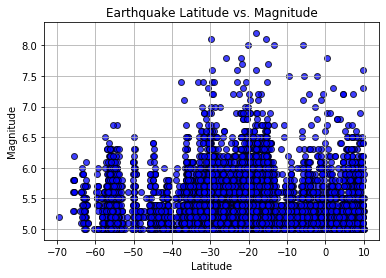

In [5]:
plt.scatter(ocean_quakes['Latitude'], ocean_quakes['Magnitude'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title(f"Earthquake Latitude vs. Magnitude - South Pacific")
plt.xlabel("Latitude")
plt.ylabel("Magnitude")
plt.grid()
plt.savefig("../images/mag_lat_ocean.png")
plt.show()

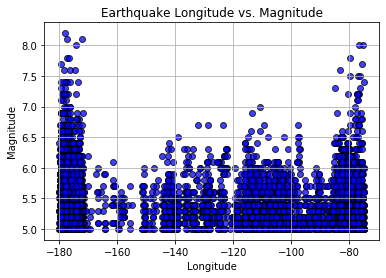

In [6]:
plt.scatter(ocean_quakes['Longitude'], ocean_quakes['Magnitude'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title(f"Earthquake Longitude vs. Magnitude - South Pacific")
plt.xlabel("Longitude")
plt.ylabel("Magnitude")
plt.grid()
plt.savefig("../images/mag_lng_ocean.png")
plt.show()

In [7]:
major_ocean_quakes = ocean_quakes[ocean_quakes.Magnitude >= 7]
major_ocean_quakes

,Magnitude,Unit,Alert,Location,Tsunami,Date,Longitude,Latitude,Timestamp
286,8.1,mww,green,"Kermadec Islands, New Zealand",1,2021-03-04,-177.2794,-29.7228,1614886113178
292,7.4,mww,green,"Kermadec Islands, New Zealand",1,2021-03-04,-177.8398,-29.6768,1614879683370
484,7.4,mww,green,south of the Kermadec Islands,1,2020-06-18,-177.8571,-33.2927,1592484593844
770,7.3,mww,green,"Kermadec Islands, New Zealand",1,2019-06-15,-178.0995,-30.6441,1560639304130
784,8.0,mww,orange,"78 km NE of Navarro, Peru",1,2019-05-26,-75.2697,-5.8119,1558856475073
858,7.5,mww,yellow,"115 km ESE of Palora, Ecuador",1,2019-02-22,-77.0505,-2.1862,1550830643770
1034,8.2,mww,green,"267 km E of Levuka, Fiji",1,2018-08-18,-178.1530,-18.1125,1534637980670
1611,7.8,mww,orange,"27 km SSE of Muisne, Ecuador",1,2016-04-16,-79.9218,0.3819,1460851116980
1958,7.1,mww,green,Fiji region,1,2014-11-01,-177.7587,-19.6903,1414868242380
1980,7.0,mww,green,southern East Pacific Rise,1,2014-10-08,-110.8112,-32.1082,1412820871440


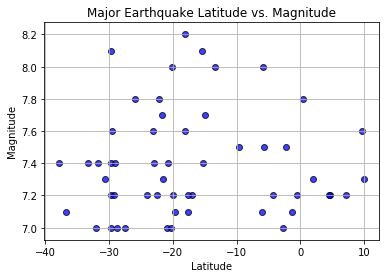

In [8]:
plt.scatter(major_ocean_quakes['Latitude'], major_ocean_quakes['Magnitude'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title(f"Major Earthquake Latitude vs. Magnitude - South Pacific")
plt.xlabel("Latitude")
plt.ylabel("Magnitude")
plt.grid()
plt.savefig("../images/maj_mag_lat_ocean.png")
plt.show()

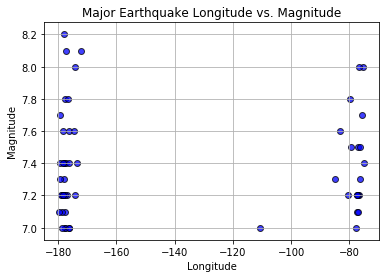

In [9]:
plt.scatter(major_ocean_quakes['Longitude'], major_ocean_quakes['Magnitude'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title(f"Major Earthquake Longitude vs. Magnitude - South Pacific")
plt.xlabel("Longitude")
plt.ylabel("Magnitude")
plt.grid()
plt.savefig("../images/maj_mag_lng_ocean.png")
plt.show()

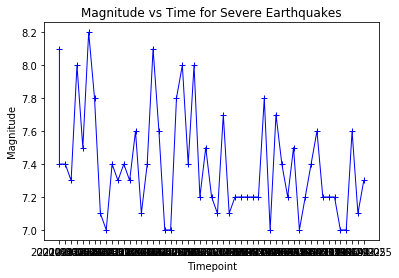

In [10]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Set x axis and variables
#s185_df = pyma_df.set_index('Mouse ID').loc['s185']
time = major_ocean_quakes['Date']
mag = major_ocean_quakes['Magnitude']
m, = plt.plot(time, mag, marker="+",color="blue", linewidth=1, label="TBD")
plt.title("Magnitude vs Time for Severe Earthquakes")
plt.xlabel("Timepoint")
plt.ylabel("Magnitude")
plt.show()

In [11]:
# Create bins
mag_bins = [5, 6, 7, 8, 10]
mag_groups = ['Moderate', 'Strong', 'Major', 'Great']
# Group via bins and clean
na_mag = na_quakes
na_mag['Severity'] = pd.cut(na_quakes['Magnitude'], mag_bins, labels=mag_groups, include_lowest=False)
na_severity = na_mag.groupby('Severity').mean()
na_severity

,Magnitude,Tsunami,Longitude,Latitude,Timestamp
Severity,,,,,
Moderate,5.386801,0.089930,-119.413523,35.595061,1.158067e+12
Strong,6.397641,0.189744,-119.951849,35.710548,1.123757e+12
Major,7.390000,0.366667,-115.495224,32.570231,1.210913e+12
Great,8.200000,1.000000,-93.899300,15.022200,1.504846e+12


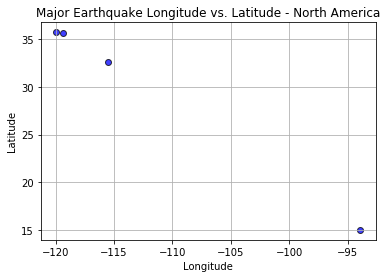

In [78]:
plt.scatter(na_severity['Longitude'], na_severity['Latitude'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title(f"Major Earthquake Longitude vs. Latitude - North America")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.savefig("../images/maj_lat_lng_na.png")
plt.show()

# Create bins
year_bins = [631152000000, 662688000000, 694224000000, 725846400000, 757382400000]
year_groups = ['1990', '1991', '1992', '1993']
na_year = na_quakes
na_year['Year'] = pd.cut(na_quakes['Timestamp'], year_bins, labels=year_groups, include_lowest=False)
na_year_gb = na_year.groupby('Year').mean()
na_year_gb

x_values = na_year_gb['Year']
y_values = na_year_gb['Magnitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,18),fontsize=15,color="red")
#plt.xlabel("Tumor Volume (mm3)")
#plt.ylabel("Weight (g)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

na_year_gb = na_year_gb.reset_index()
time = na_year_gb['Year']
mag = na_year_gb['Magnitude']
mag, = plt.plot(time, mag, marker="+",color="blue", linewidth=1, label="TBD")
plt.title("Magnitude vs Year for Earthquakes")
plt.xlabel("Timepoint")
plt.ylabel("Magnitude")
plt.show()
na_year_gb

In [39]:
years_labels = []
for i in range(1990,2023):
    years_labels.append(i)

years = []    
for year in years_labels:
    dt=(datetime.datetime(year, 1, 1, 0, 0, 0, 0))
    unix_ts = dt.timestamp()
    unix_ts = unix_ts*1000
    years.append(unix_ts)
year_labels = years_labels.remove(2022)

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [60]:
# Create bins
#year_labels = years_labels.remove(2022)
na_year = na_quakes
na_year['Year'] = pd.cut(na_quakes['Timestamp'], years, labels=years_labels, include_lowest=False)
na_year_mean = na_year.groupby('Year').mean()
na_year_mean
na_year_mean = na_year_mean.reset_index()
na_year_mean.to_csv("../Data/na_year_mean.csv", index=False, header=True)

In [61]:
#year_labels = years_labels.remove(2022)
sa_year = sa_quakes
sa_year['Year'] = pd.cut(sa_quakes['Timestamp'], years, labels=years_labels, include_lowest=False)
sa_year_mean = sa_year.groupby('Year').mean()
sa_year_mean
sa_year_mean = sa_year_mean.reset_index()
sa_year_mean.to_csv("../Data/sa_year_mean.csv", index=False, header=True)

In [62]:
#year_labels = years_labels.remove(2022)
ocean_year = ocean_quakes
ocean_year['Year'] = pd.cut(ocean_quakes['Timestamp'], years, labels=years_labels, include_lowest=False)
ocean_year_mean = ocean_year.groupby('Year').mean()
ocean_year_mean
ocean_year_mean = ocean_year_mean.reset_index()
ocean_year_mean.to_csv("../Data/ocean_year_mean.csv", index=False, header=True)

In [63]:
# Create bins
#na_year = na_quakes
#na_year['Year'] = pd.cut(na_quakes['Timestamp'], years, labels=years_labels, include_lowest=False)
na_year_count = na_year.groupby('Year').count()
na_year_count
na_year_count = na_year_count.reset_index()
na_year_count.to_csv("../Data/na_year_count.csv", index=False, header=True)

In [64]:
# Create bins
#sa_year = sa_quakes
#sa_year['Year'] = pd.cut(na_quakes['Timestamp'], years, labels=years_labels, include_lowest=False)
sa_year_count = sa_year.groupby('Year').count()
sa_year_count
sa_year_count = sa_year_count.reset_index()
sa_year_count.to_csv("../Data/sa_year_count.csv", index=False, header=True)

In [65]:
# Create bins
#ocean_year = _quakes
#na_year['Year'] = pd.cut(na_quakes['Timestamp'], years, labels=years_labels, include_lowest=False)
ocean_year_count = ocean_year.groupby('Year').count()
ocean_year_count
ocean_year_count = ocean_year_count.reset_index()
ocean_year_count.to_csv("../Data/ocean_year_count.csv", index=False, header=True)
#ocean_year_count

In [36]:
x_axis = np.arange(0, len(years_labels))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

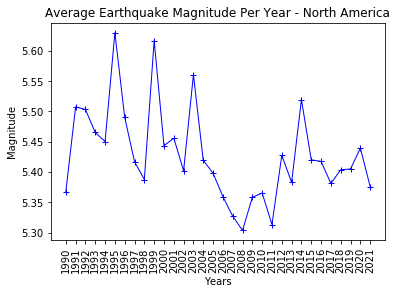

In [79]:
#na_year_mean = na_year_mean.reset_index()
time = na_year_mean['Year']
mag = na_year_mean['Magnitude']
mag, = plt.plot(time, mag, marker="+",color="blue", linewidth=1, label="TBD")
plt.title("Average Earthquake Magnitude Per Year - North America")
plt.xlabel("Years")
plt.ylabel("Magnitude")
plt.xticks(tick_locations, years_labels, rotation=90)
plt.savefig("../images/avg_mag_year_na.png")
plt.show()

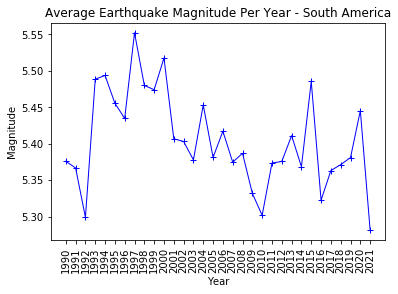

In [80]:
#sa_year_mean = sa_year_mean.reset_index()
time = sa_year_mean['Year']
mag = sa_year_mean['Magnitude']
mag, = plt.plot(time, mag, marker="+",color="blue", linewidth=1)
plt.title("Average Earthquake Magnitude Per Year - South America")
plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.xticks(tick_locations, years_labels, rotation=90)
plt.savefig("../images/avg_mag_year_sa.png")
plt.show()

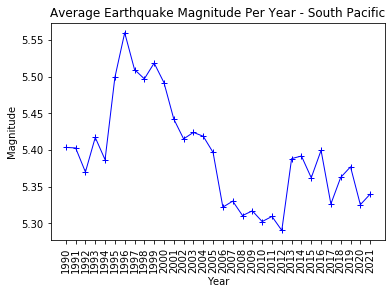

In [81]:
#ocean_year_mean = ocean_year_mean.reset_index()
time = ocean_year_mean['Year']
mag = ocean_year_mean['Magnitude']
mag, = plt.plot(time, mag, marker="+",color="blue", linewidth=1, label="TBD")
plt.title("Average Earthquake Magnitude Per Year - South Pacific")
plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.xticks(tick_locations, years_labels, rotation=90)
plt.savefig("../images/avg_mag_year_ocean.png")
plt.show()

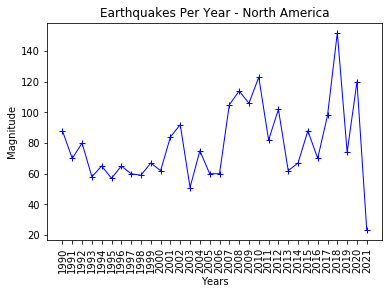

In [82]:
#na_year_count = na_year_mean.reset_index()
na_time_count = na_year_count['Year']
na_mag_count = na_year_count['Magnitude']
na_mag_c, = plt.plot(na_time_count, na_mag_count, marker="+",color="blue", linewidth=1, label="TBD")
plt.title("Earthquakes Per Year - North America")
plt.xlabel("Years")
plt.ylabel("Magnitude")
plt.xticks(tick_locations, years_labels, rotation=90)
plt.savefig("../images/quakes_year_na.png")
plt.show()

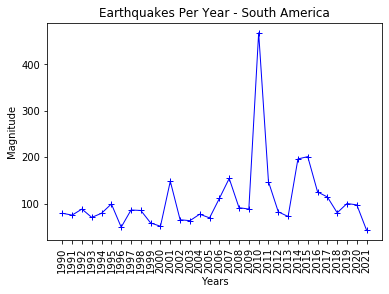

In [83]:
sa_time_count = sa_year_count['Year']
sa_mag_count = sa_year_count['Magnitude']
sa_mag_c, = plt.plot(sa_time_count, sa_mag_count, marker="+",color="blue", linewidth=1, label="TBD")
plt.title("Earthquakes Per Year - South America")
plt.xlabel("Years")
plt.ylabel("Magnitude")
plt.xticks(tick_locations, years_labels, rotation=90)
plt.savefig("../images/quakes_year_sa.png")
plt.show()

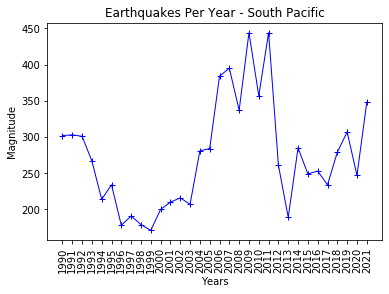

In [84]:
ocean_time_count = ocean_year_count['Year']
ocean_mag_count = ocean_year_count['Magnitude']
ocean_mag_c, = plt.plot(ocean_time_count, ocean_mag_count, marker="+",color="blue", linewidth=1, label="TBD")
plt.title("Earthquakes Per Year - South Pacific")
plt.xlabel("Years")
plt.ylabel("Magnitude")
plt.xticks(tick_locations, years_labels, rotation=90)
plt.savefig("../images/quakes_year_ocean.png")
plt.show()